# Data Science Essensials Final Projects

### Dataset: Bank Marketing Dataset

The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls.

The classification goal is to predict if the client will subscribe a term deposit (variable y).

Number of Instances: 45211

Number of Attributes: 16 + output attribute.

Source: http://archive.ics.uci.edu/ml/datasets.html


In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.grid_search import GridSearchCV
from sklearn.cross_validation import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
import math
import numpy as np
import sklearn
import pickle
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from sklearn import cross_validation
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import pandas as pd
import pylab as plb
import matplotlib.pyplot as plt
%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
df=pd.read_csv("bank-full.csv", header=0)

In [3]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


# EDA for all 17 attributes of Dataset:
    

In [4]:
df.age.value_counts()

32    2085
31    1996
33    1972
34    1930
35    1894
36    1806
30    1757
37    1696
39    1487
38    1466
40    1355
41    1291
42    1242
45    1216
29    1185
46    1175
43    1161
44    1136
47    1088
28    1038
48     997
49     994
50     939
51     936
52     911
27     909
53     891
57     828
54     811
55     806
      ... 
67      54
71      54
72      52
20      50
77      44
73      44
69      44
75      39
74      37
68      36
19      35
76      32
80      31
78      30
79      25
83      22
82      19
81      17
18      12
84       9
86       9
85       5
87       4
89       3
88       2
90       2
92       2
93       2
95       2
94       1
Name: age, dtype: int64

In [5]:
df.age.describe()

count    45211.000000
mean        40.936210
std         10.618762
min         18.000000
25%         33.000000
50%         39.000000
75%         48.000000
max         95.000000
Name: age, dtype: float64

In [6]:
df[df.age.isnull()]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y


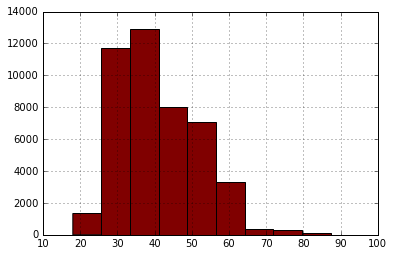

In [7]:
df.age.hist(bins=10, color = "maroon")

In [8]:
df.job.value_counts()

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

In [9]:
df.job.describe()

count           45211
unique             12
top       blue-collar
freq             9732
Name: job, dtype: object

In [10]:
df[df.job.isnull()]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y


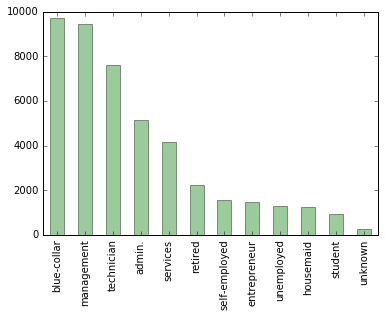

In [11]:
df.job.value_counts().plot(kind='bar', color= 'green', alpha= .4)

In [12]:
df.marital.value_counts()

married     27214
single      12790
divorced     5207
Name: marital, dtype: int64

In [13]:
df.marital.describe()

count       45211
unique          3
top       married
freq        27214
Name: marital, dtype: object

In [14]:
df[df.marital.isnull()]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y


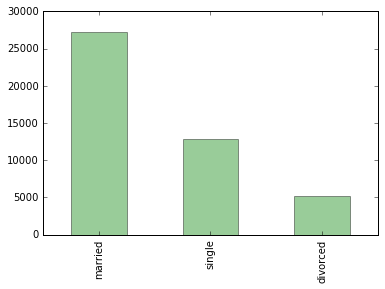

In [15]:
df.marital.value_counts().plot(kind='bar', color= 'green', alpha= .4)

In [16]:
df.education.value_counts()

secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64

In [17]:
df.education.describe()

count         45211
unique            4
top       secondary
freq          23202
Name: education, dtype: object

In [18]:
df[df.education.isnull()]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y


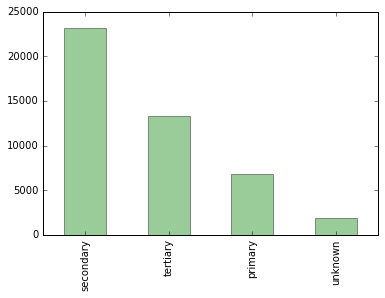

In [19]:
df.education.value_counts().plot(kind='bar', color= 'green', alpha= .4)

In [20]:
df.default.value_counts()

no     44396
yes      815
Name: default, dtype: int64

In [21]:
df.default.describe()

count     45211
unique        2
top          no
freq      44396
Name: default, dtype: object

In [22]:
df[df.default.isnull()]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y


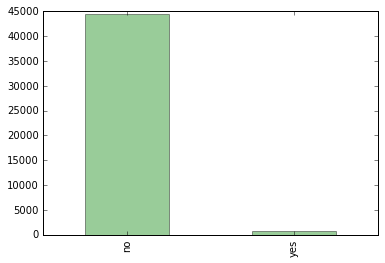

In [23]:
df.default.value_counts().plot(kind='bar', color= 'green', alpha= .4)

In [24]:
df.balance.value_counts()

 0        3514
 1         195
 2         156
 4         139
 3         134
 5         113
 6          88
 8          81
 23         75
 10         69
 7          69
 11         65
 25         63
 20         62
 19         60
 15         59
 47         59
 21         59
 49         59
 33         58
 13         57
 53         56
 16         56
 24         55
 79         55
 91         54
 145        54
 46         54
 9          54
 14         53
          ... 
 6205        1
 6320        1
 4394        1
 2327        1
 4404        1
 8460        1
 29312       1
 4362        1
-2049        1
 17332       1
 2633        1
 6571        1
 1338        1
-568         1
 8402        1
 8863        1
 10451       1
 29184       1
 13242       1
 4586        1
 51439       1
 4092        1
-472         1
 8652        1
 4554        1
 4305        1
 6352        1
 18881       1
 14889       1
 7218        1
Name: balance, dtype: int64

In [25]:
df.balance.describe()

count     45211.000000
mean       1362.272058
std        3044.765829
min       -8019.000000
25%          72.000000
50%         448.000000
75%        1428.000000
max      102127.000000
Name: balance, dtype: float64

In [26]:
df[df.balance.isnull()]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y


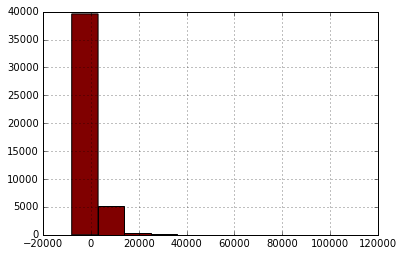

In [27]:
df.balance.hist(bins=10, color = "maroon")

In [28]:
df.housing.value_counts()

yes    25130
no     20081
Name: housing, dtype: int64

In [29]:
df.housing.describe()

count     45211
unique        2
top         yes
freq      25130
Name: housing, dtype: object

In [30]:
df[df.housing.isnull()]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y


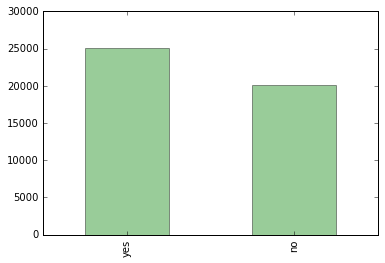

In [31]:
df.housing.value_counts().plot(kind='bar', color= 'green', alpha= .4)

In [32]:
df.loan.value_counts()

no     37967
yes     7244
Name: loan, dtype: int64

In [33]:
df.loan.describe()

count     45211
unique        2
top          no
freq      37967
Name: loan, dtype: object

In [34]:
df[df.loan.isnull()]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y


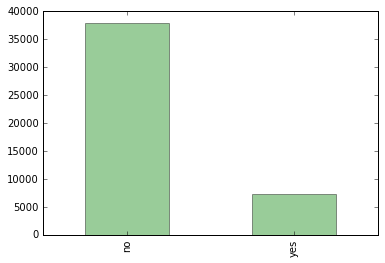

In [35]:
df.loan.value_counts().plot(kind='bar', color= 'green', alpha= .4)

In [36]:
df.contact.value_counts()

cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64

In [37]:
df.contact.describe()

count        45211
unique           3
top       cellular
freq         29285
Name: contact, dtype: object

In [38]:
df[df.contact.isnull()]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y


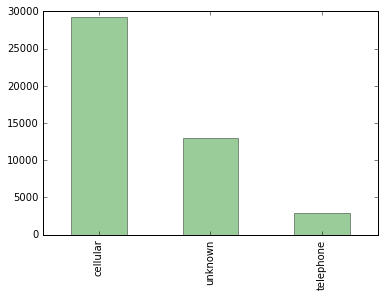

In [39]:
df.contact.value_counts().plot(kind='bar', color= 'green', alpha= .4)

In [40]:
df.day.value_counts()

20    2752
18    2308
21    2026
17    1939
6     1932
5     1910
14    1848
8     1842
28    1830
7     1817
19    1757
29    1745
15    1703
12    1603
13    1585
30    1566
9     1561
11    1479
4     1445
16    1415
2     1293
27    1121
3     1079
26    1035
23     939
22     905
25     840
31     643
10     524
24     447
1      322
Name: day, dtype: int64

In [41]:
df.day.describe()

count    45211.000000
mean        15.806419
std          8.322476
min          1.000000
25%          8.000000
50%         16.000000
75%         21.000000
max         31.000000
Name: day, dtype: float64

In [42]:
df[df.day.isnull()]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y


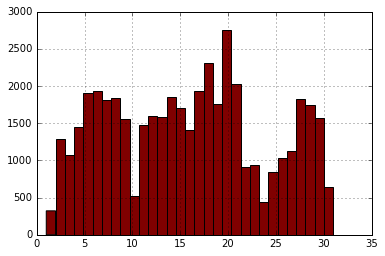

In [43]:
df.day.hist(bins=31, color = "maroon")

In [44]:
df.month.value_counts()

may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: month, dtype: int64

In [45]:
df.month.describe()

count     45211
unique       12
top         may
freq      13766
Name: month, dtype: object

In [46]:
df[df.month.isnull()]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y


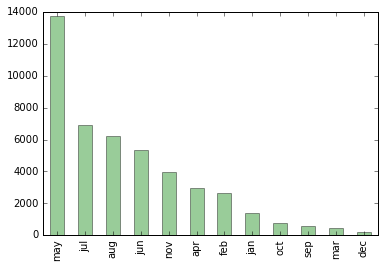

In [47]:
df.month.value_counts().plot(kind='bar', color= 'green', alpha= .4)

In [48]:
df.duration.value_counts()

124     188
90      184
89      177
122     175
104     175
114     175
136     174
112     174
139     174
121     173
91      170
119     170
88      170
103     169
92      168
123     168
97      168
111     166
73      166
85      166
113     166
81      166
125     165
82      165
108     165
106     165
80      164
87      163
101     163
126     163
       ... 
1255      1
3366      1
1319      1
1298      1
1650      1
2485      1
947       1
2453      1
2389      1
1971      1
1875      1
1491      1
1395      1
1331      1
934       1
1107      1
1158      1
1254      1
1778      1
1286      1
1318      1
1478      1
1606      1
1702      1
2770      1
2150      1
1970      1
1906      1
1842      1
2015      1
Name: duration, dtype: int64

In [49]:
df.duration.describe()

count    45211.000000
mean       258.163080
std        257.527812
min          0.000000
25%        103.000000
50%        180.000000
75%        319.000000
max       4918.000000
Name: duration, dtype: float64

In [50]:
df[df.duration.isnull()]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y


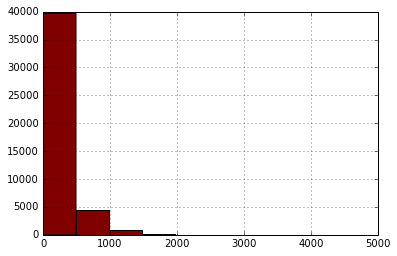

In [51]:
df.duration.hist(bins=10, color = "maroon")

In [52]:
df.campaign.value_counts()

1     17544
2     12505
3      5521
4      3522
5      1764
6      1291
7       735
8       540
9       327
10      266
11      201
12      155
13      133
14       93
15       84
16       79
17       69
18       51
19       44
20       43
21       35
22       23
23       22
25       22
24       20
28       16
29       16
26       13
31       12
27       10
32        9
30        8
33        6
34        5
36        4
35        4
43        3
38        3
41        2
50        2
37        2
51        1
55        1
46        1
58        1
44        1
39        1
63        1
Name: campaign, dtype: int64

In [53]:
df.campaign.describe()

count    45211.000000
mean         2.763841
std          3.098021
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         63.000000
Name: campaign, dtype: float64

In [54]:
df[df.campaign.isnull()]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y


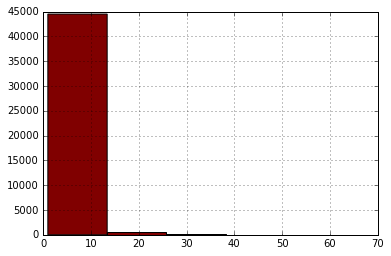

In [55]:
df.campaign.hist(bins=5, color = "maroon")

In [56]:
df.pdays.value_counts()

-1      36954
 182      167
 92       147
 183      126
 91       126
 181      117
 370       99
 184       85
 364       77
 95        74
 350       73
 94        72
 175       71
 185       68
 93        65
 343       65
 188       64
 189       60
 186       60
 174       57
 96        57
 349       57
 363       55
 97        54
 90        54
 196       51
 365       51
 368       49
 342       49
 98        49
        ...  
 774        1
 550        1
 396        1
 492        1
 466        1
 45         1
 434        1
 18         1
 529        1
 465        1
 401        1
 784        1
 656        1
 592        1
 528        1
 464        1
 432        1
 655        1
 495        1
 543        1
 47         1
 782        1
 686        1
 558        1
 526        1
 749        1
 717        1
 589        1
 493        1
 32         1
Name: pdays, dtype: int64

In [57]:
df.pdays.describe()

count    45211.000000
mean        40.197828
std        100.128746
min         -1.000000
25%         -1.000000
50%         -1.000000
75%         -1.000000
max        871.000000
Name: pdays, dtype: float64

In [58]:
df[df.pdays.isnull()]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y


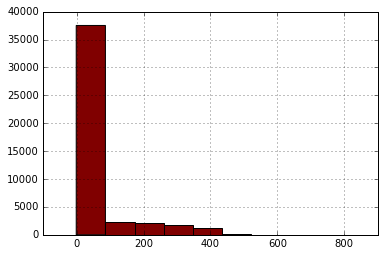

In [59]:
df.pdays.hist(bins=10, color = "maroon")

In [60]:
df.previous.value_counts()

0      36954
1       2772
2       2106
3       1142
4        714
5        459
6        277
7        205
8        129
9         92
10        67
11        65
12        44
13        38
15        20
14        19
17        15
16        13
19        11
23         8
20         8
22         6
18         6
24         5
27         5
29         4
25         4
21         4
30         3
28         2
26         2
37         2
38         2
55         1
40         1
35         1
58         1
51         1
41         1
32         1
275        1
Name: previous, dtype: int64

In [61]:
df.previous.describe()

count    45211.000000
mean         0.580323
std          2.303441
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        275.000000
Name: previous, dtype: float64

In [62]:
df[df.previous.isnull()]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y


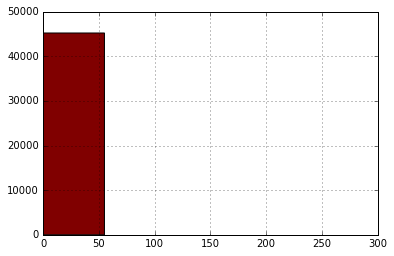

In [63]:
df.previous.hist(bins=5, color = "maroon")

In [64]:
df.poutcome.value_counts()

unknown    36959
failure     4901
other       1840
success     1511
Name: poutcome, dtype: int64

In [65]:
df.poutcome.describe()

count       45211
unique          4
top       unknown
freq        36959
Name: poutcome, dtype: object

In [66]:
df[df.poutcome.isnull()]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y


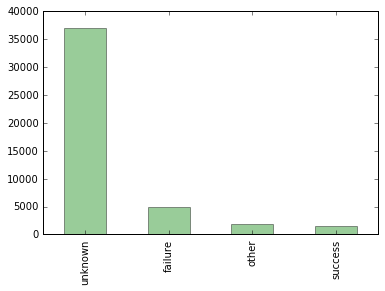

In [67]:
df.poutcome.value_counts().plot(kind='bar', color= 'green', alpha= .4)

In [68]:
df.y .value_counts()

no     39922
yes     5289
Name: y, dtype: int64

In [69]:
df.y.describe()

count     45211
unique        2
top          no
freq      39922
Name: y, dtype: object

In [70]:
df[df.y.isnull()]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y


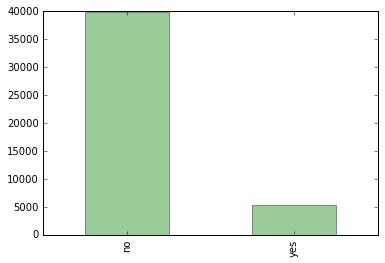

In [71]:
df.y.value_counts().plot(kind='bar', color= 'green', alpha= .4)

From above EDA we can see that none of the attributes have missing values and the data is clean.
age, balance, day, campaign, pdays, duration, previous are continuous variable since these variables have range of values. 
job, marital, education, default, housing, loan, contact, month, poutcome and y are categorical variables since these variables are further divided into categories.

# Preprocessing



In [72]:
#Converting the binary datatype(Yes/No) attribute to continuos attibutes
le=preprocessing.LabelEncoder()

df.default=le.fit_transform(df.default)
df.housing=le.fit_transform(df.housing)
df.loan=le.fit_transform(df.loan)
df.y=le.fit_transform(df.y)

In [73]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,0,2143,1,0,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,0,29,1,0,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,0,2,1,1,unknown,5,may,76,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,0,1506,1,0,unknown,5,may,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,0,1,0,0,unknown,5,may,198,1,-1,0,unknown,0
5,35,management,married,tertiary,0,231,1,0,unknown,5,may,139,1,-1,0,unknown,0
6,28,management,single,tertiary,0,447,1,1,unknown,5,may,217,1,-1,0,unknown,0
7,42,entrepreneur,divorced,tertiary,1,2,1,0,unknown,5,may,380,1,-1,0,unknown,0
8,58,retired,married,primary,0,121,1,0,unknown,5,may,50,1,-1,0,unknown,0
9,43,technician,single,secondary,0,593,1,0,unknown,5,may,55,1,-1,0,unknown,0


In [74]:
X = df.rename(columns={'y':'Subscribe?'})

In [75]:
Y = X.pop('Subscribe?')

In [76]:
X

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,58,management,married,tertiary,0,2143,1,0,unknown,5,may,261,1,-1,0,unknown
1,44,technician,single,secondary,0,29,1,0,unknown,5,may,151,1,-1,0,unknown
2,33,entrepreneur,married,secondary,0,2,1,1,unknown,5,may,76,1,-1,0,unknown
3,47,blue-collar,married,unknown,0,1506,1,0,unknown,5,may,92,1,-1,0,unknown
4,33,unknown,single,unknown,0,1,0,0,unknown,5,may,198,1,-1,0,unknown
5,35,management,married,tertiary,0,231,1,0,unknown,5,may,139,1,-1,0,unknown
6,28,management,single,tertiary,0,447,1,1,unknown,5,may,217,1,-1,0,unknown
7,42,entrepreneur,divorced,tertiary,1,2,1,0,unknown,5,may,380,1,-1,0,unknown
8,58,retired,married,primary,0,121,1,0,unknown,5,may,50,1,-1,0,unknown
9,43,technician,single,secondary,0,593,1,0,unknown,5,may,55,1,-1,0,unknown


In [77]:
# Getting just the numeric variables by selecting only the variables that are not "object" datatypes.
numeric_variables = list(X.dtypes[X.dtypes != "object"].index)
X[numeric_variables].head() 

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous
0,58,0,2143,1,0,5,261,1,-1,0
1,44,0,29,1,0,5,151,1,-1,0
2,33,0,2,1,1,5,76,1,-1,0
3,47,0,1506,1,0,5,92,1,-1,0
4,33,0,1,0,0,5,198,1,-1,0


In [78]:
# Here is a simple function to show descriptive stats on the categorical variables
def describe_categorical(X):
    """
    Just like .describe(), but returns the results for
    categorical variables only.
    """
    from IPython.display import display, HTML
    display(HTML(X[X.columns[X.dtypes == "object"]].describe().to_html()))

In [79]:
describe_categorical(X)

,job,marital,education,contact,month,poutcome
count,45211,45211,45211,45211,45211,45211
unique,12,3,4,3,12,4
top,blue-collar,married,secondary,cellular,may,unknown
freq,9732,27214,23202,29285,13766,36959


In [80]:
#get_dummies returns an indicator variable for each category.
categorical_variables = ['job', 'marital', 'education', 'contact', 'month', 'poutcome']

for variable in categorical_variables:
    # Fill missing data with the word "Missing"
    # X[variable].fillna("Missing", inplace=True)
    # Create array of dummies
    dummies = pd.get_dummies(X[variable], prefix=variable)
    # Update X to include dummies and drop the main variable
    X = pd.concat([X, dummies], axis=1)
    X.drop([variable], axis=1, inplace=True)

In [81]:
X

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,0,2143,1,0,5,261,1,-1,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,44,0,29,1,0,5,151,1,-1,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,33,0,2,1,1,5,76,1,-1,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,47,0,1506,1,0,5,92,1,-1,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,33,0,1,0,0,5,198,1,-1,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
5,35,0,231,1,0,5,139,1,-1,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
6,28,0,447,1,1,5,217,1,-1,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
7,42,1,2,1,0,5,380,1,-1,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
8,58,0,121,1,0,5,50,1,-1,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
9,43,0,593,1,0,5,55,1,-1,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


# Logistic Regression

In [82]:
#building test and training sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [83]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(penalty='l2', C=10)

In [84]:
model.fit(X_train, Y_train)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [85]:
from sklearn.metrics import accuracy_score
print "Logistic accuracy is %2.2f" % accuracy_score(Y_test,model.predict(X_test))

Logistic accuracy is 0.90


In [86]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report

In [87]:
print "\n\n---Logistic Model---"
#logistic AUC
logit_roc_auc = roc_auc_score(Y_test, model.predict(X_test))
print "Logistic AUC = %2.2f" % logit_roc_auc
print classification_report(Y_test, model.predict(X_test) )



---Logistic Model---
Logistic AUC = 0.66
             precision    recall  f1-score   support

          0       0.92      0.97      0.94      7952
          1       0.65      0.34      0.45      1091

avg / total       0.88      0.90      0.88      9043



In [88]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(Y_test, model.predict_proba(X_test)[:,1])

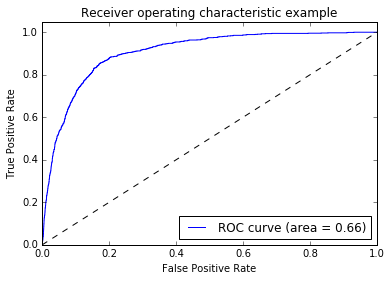

In [89]:
# Plot of a ROC curve for a specific class
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

# Random Forest Regressor

In [90]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=100, oob_score=True, random_state=42)

In [91]:
# I only use numeric_variables for creating the model
model.fit(X[numeric_variables], Y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=100, n_jobs=1, oob_score=True, random_state=42,
           verbose=0, warm_start=False)

In [92]:
# For regression, the oob_score_ attribute gives the R^2 based on the oob predictions.
model.oob_score_

0.26695958282941801

In [93]:
y_oob = model.oob_prediction_
print "c-stat: ", roc_auc_score(Y, y_oob)

c-stat:  0.875243118011


We now have a benchmark, it provides us a benchmark for improvement.

In [94]:
model = RandomForestRegressor(100, oob_score=True, n_jobs=-1, random_state=42)
model.fit(X,Y)
print "C-stat: ", roc_auc_score(Y, model.oob_prediction_)

C-stat:  0.921094484595


# Variable importance measures

In [95]:
model.feature_importances_

array([ 0.09006135,  0.00175397,  0.10097974,  0.01925964,  0.00710369,
        0.08090219,  0.27497856,  0.03111722,  0.04175625,  0.01372813,
        0.00786923,  0.00739454,  0.00334402,  0.00303863,  0.00862899,
        0.00314726,  0.00412474,  0.0058793 ,  0.00398679,  0.00942357,
        0.00419699,  0.00122358,  0.00672896,  0.00830324,  0.00716071,
        0.00529486,  0.00795407,  0.00870732,  0.00502877,  0.00576193,
        0.00315005,  0.01218725,  0.01360755,  0.00792068,  0.00409696,
        0.00808028,  0.00414231,  0.00679068,  0.01224393,  0.01462582,
        0.00898566,  0.00731561,  0.01117904,  0.00739784,  0.00334786,
        0.00277276,  0.09150883,  0.00180863])

C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:3: FutureWarning: sort is deprecated, use sort_values(inplace=True) for INPLACE sorting
  app.launch_new_instance()


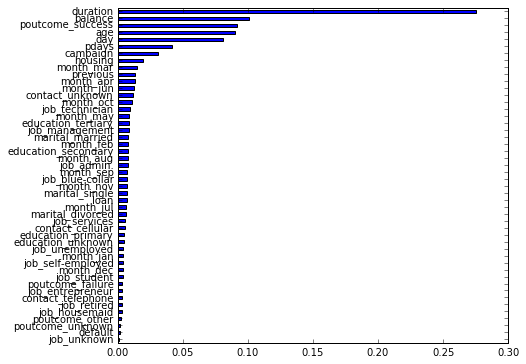

In [96]:
# Simple version that shows all of the variables
feature_importances = pd.Series(model.feature_importances_, index=X.columns)
feature_importances.sort()
feature_importances.plot(kind="barh", figsize=(7,6));

# Parameter tests

Parameters to test

 * ###Parameters that will make your model better
  * <b>n_estimators</b>: The number of trees in the forest. Choose as high of a number as your computer can handle.
  * <b>max_features</b>: The number of features to consider when looking for the best split. Try ["auto", "None", "sqrt", "log2", 0.9, and 0.2]
  * <b>min_samples_leaf</b>: The minimum number of samples in newly created leaves.Try [1, 2, 3]. If 3 is the best, try higher numbers such as 1 through 10.
 * ###Parameters that will make it easier to train your model
  * <b>n_jobs</b>: Determines if multiple processors should be used to train and test the model. Always set this to -1 and %%timeit vs. if it is set to 1. It should be much faster (especially when many trees are trained).

# n_jobs

In [97]:
%%timeit
model = RandomForestRegressor(100, oob_score=True, n_jobs=1, random_state=42)
model.fit(X, Y)

1 loop, best of 3: 2min 20s per loop


In [98]:
%%timeit
model = RandomForestRegressor(100, oob_score=True, n_jobs=-1, random_state=42)
model.fit(X, Y)

1 loop, best of 3: 1min 1s per loop


# n_estimators

30 trees
C-stat:  0.897417169

50 trees
C-stat:  0.912121660494

100 trees
C-stat:  0.921094484595

200 trees
C-stat:  0.925506133728

500 trees
C-stat:  0.92870538844

1000 trees
C-stat:  0.929337359108



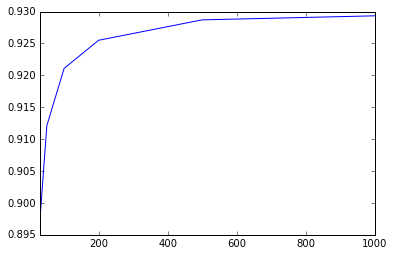

In [99]:
results = []
n_estimator_options = [30, 50, 100, 200, 500, 1000]

for trees in n_estimator_options:
    model = RandomForestRegressor(trees, oob_score=True, n_jobs=-1, random_state=42)
    model.fit(X, Y)
    print trees, "trees"
    roc = roc_auc_score(Y, model.oob_prediction_)
    print "C-stat: ", roc
    results.append(roc)
    print ""
    
pd.Series(results, n_estimator_options).plot();

# max_features

auto option
C-stat:  0.929337359108

None option
C-stat:  0.929337359108

sqrt option
C-stat:  0.932716045296

log2 option
C-stat:  0.932098820247

0.9 option
C-stat:  0.93001382001

0.2 option
C-stat:  0.934460809374



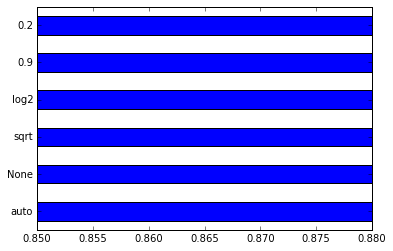

In [102]:
results = []
max_features_options = ["auto", None, "sqrt", "log2", 0.9, 0.2]

for max_features in max_features_options:
    model = RandomForestRegressor(n_estimators=1000, oob_score=True, n_jobs=-1, random_state=42, max_features=max_features)
    model.fit(X, Y)
    print max_features, "option"
    roc = roc_auc_score(Y, model.oob_prediction_)
    print "C-stat: ", roc
    results.append(roc)
    print ""
    


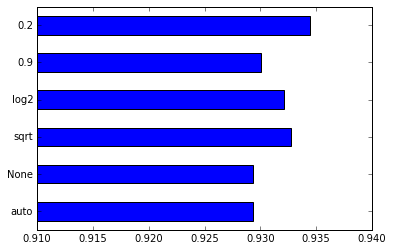

In [103]:
pd.Series(results, max_features_options).plot(kind="barh", xlim=(.91,.94));

# min_samples_leaf

1 min samples
C-stat:  0.934460809374

3 min samples
C-stat:  0.935280343276

4 min samples
C-stat:  0.935147412478

5 min samples
C-stat:  0.93504532979

7 min samples
C-stat:  0.93461116875

9 min samples
C-stat:  0.934147023925

10 min samples
C-stat:  0.933994620953



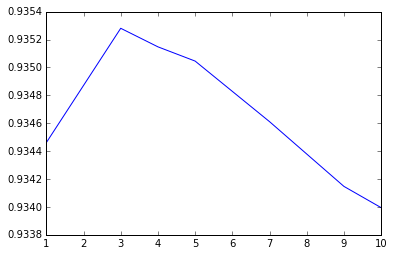

In [104]:
results = []
min_samples_leaf_options = [1, 3, 4, 5,  7, 9, 10]

for min_samples in min_samples_leaf_options:
    model = RandomForestRegressor(n_estimators=1000, 
                                  oob_score=True, 
                                  n_jobs=-1, 
                                  random_state=42, 
                                  max_features=0.2, 
                                  min_samples_leaf=min_samples)
    model.fit(X, Y)
    print min_samples, "min samples"
    roc = roc_auc_score(Y, model.oob_prediction_)
    print "C-stat: ", roc
    results.append(roc)
    print ""
    
pd.Series(results, min_samples_leaf_options).plot();

# Final RandomForestRegressor model

In [105]:
model = RandomForestRegressor(n_estimators=1000, 
                              oob_score=True, 
                              n_jobs=-1, 
                              random_state=42, 
                              max_features= 0.2, 
                              min_samples_leaf=3)
model.fit(X, Y)
roc = roc_auc_score(Y, model.oob_prediction_)
print "C-stat: ", roc

C-stat:  0.935280343276


# Random Forest Classifier with Grid Search 

In [129]:

### Grid Search
n_estimators = [300,500, 1000]
max_features = ['auto', 'sqrt','log2',0.2]
min_samples_split = [3,5,7]


rfc = RandomForestClassifier(n_jobs=1)
#Parameters of pipelines can be set using ‘__’ separated parameter names:
estimator = GridSearchCV(rfc,
                         dict(n_estimators=n_estimators,
                              max_features=max_features,
                              min_samples_split=min_samples_split
                              ), cv=None, n_jobs=-1)


                              

In [130]:
estimator.fit(X_train, Y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'min_samples_split': [3, 5, 7], 'max_features': ['auto', 'sqrt', 'log2', 0.2], 'n_estimators': [300, 500, 1000]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [131]:
estimator.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=0.2, max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=3,
            min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [132]:
best_model = estimator.best_estimator_

# Accuracy

In [133]:
accuracy = accuracy_score(Y_test, best_model.predict(X_test))
print "Accuracy: ", accuracy

Accuracy:  0.906115227248


# Precision and Recall

In [134]:
print classification_report(Y_test, best_model.predict(X_test))

             precision    recall  f1-score   support

          0       0.93      0.97      0.95      7952
          1       0.66      0.45      0.54      1091

avg / total       0.90      0.91      0.90      9043



In [135]:
print confusion_matrix(Y_test, best_model.predict(X_test))

[[7705  247]
 [ 602  489]]


Herein, <br/> 
         True Negative = 7705   <br/> 
         True Positive = 489 <br />
         False Negative = 602  <br />
         False Positive = 247 <br />
         
 Therefore, <br /> 
 
   **Precision:**  489 / 489 + 247 = .63 <br /> 
   **Recall:**   489 / 489 + 602 = .44
   
Precision:   The model will correctly identify 63% of bank subscriber. Conversely there is a 37% chance it will identify a non-malignant as a malignant.  (tp / tp+fp)

Recall:  Of the people the model identified as bank subscriber, 44% of them will actually be subscribed the bank.  (tp / tp + fn)

# AUC

In [136]:
roc = roc_auc_score(Y_test, best_model.predict_proba(X_test)[:,1])
print "AUC Score: ", roc

AUC Score:  0.92967008052


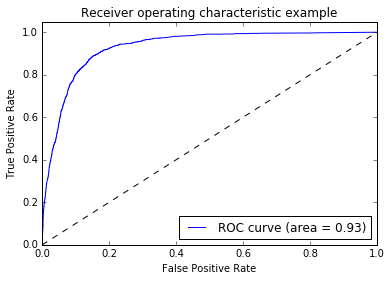

In [137]:
fpr, tpr, thresholds = roc_curve(Y_test, best_model.predict_proba(X_test)[:,1])
# Plot of a ROC curve for a specific class
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

# K-Fold Cross Validation
1) Split the data into K chunks

2) Train K models, retain a chunk for testing and use the other K-1 chunks for training.

3) The result is K scores, which can be combined into a single average score for the model

In [138]:
from sklearn import cross_validation
scores = cross_validation.cross_val_score(best_model, X, Y, cv=10)

In [139]:
scores

array([ 0.88500663,  0.81424149,  0.70603849,  0.76863526,  0.80269852,
        0.85158151,  0.77239549,  0.30568458,  0.73545676,  0.48849558])

In [140]:
mean_score = scores.mean()
std_dev = scores.std()
std_error = scores.std() / math.sqrt(scores.shape[0])
ci =  2.262 * std_error
lower_bound = mean_score - ci
upper_bound = mean_score + ci

print "Score is %f +/-  %f" % (mean_score, ci)

Score is 0.713023 +/-  0.121932
